In [1]:
# Std-lib
import collections
from pathlib import Path
import re
from typing import *

# Third party
import h5py
import numpy as np
import matplotlib.pyplot as plt
import rich

# First party
# import data_generation_arithmetic
# import script_data_subset_selection
import general_utils

# Increases the resolution of the figures
%config InlineBackend.figure_format = 'retina'

In [2]:
DATA_FOLDER = Path("data/")
DATA_PATH = DATA_FOLDER / "349_6_6_200000.json.pkl"
SUBSET_PATH = DATA_FOLDER / "subsets/subset_10000_seed_453345_of_349_6_6_50000.json"
AGREEMENT_STATS_PATHS = dict(
    basic=Path("agreement_basic.h5"), 
    oracle=Path("agreement_oracle.h5"),
)

In [3]:
agreement_files = {
    k: h5py.File(AGREEMENT_STATS_PATHS[k], "r") 
    for k in AGREEMENT_STATS_PATHS
}

for name in agreement_files:
    rich.print(f"[bold]{name.title()}:")
    general_utils.print_structure_h5(agreement_files[name])

Basic:

"/": File
        - file_md5s: ndarray shape=(29,) dtype=object
        - files_used: ndarray shape=(29,) dtype=object
"/top-1_all": Dataset (57, 50300) float64
"/pairwise_all": Dataset (57, 50300) float64
"/accuracy_per_epoch": Dataset (29, 57) float64

Oracle:

"/": File
        - file_md5s: ndarray shape=(16,) dtype=object
        - files_used: ndarray shape=(16,) dtype=object
"/top-1_all": Dataset (57, 50300) float64
"/pairwise_all": Dataset (57, 50300) float64
"/accuracy_per_epoch": Dataset (16, 57) float64

In [4]:
top_1_per_epoch = {k: np.mean(agreement_files[k]["top-1_all"], axis=-1) for k in agreement_files}
top_1_per_epoch_std = {k: np.std(agreement_files[k]["top-1_all"], axis=-1) for k in agreement_files}
pairwise_per_epoch = {k: np.mean(agreement_files[k]["pairwise_all"], axis=-1) for k in agreement_files}
pairwise_per_epoch_std = {k: np.std(agreement_files[k]["pairwise_all"], axis=-1) for k in agreement_files}
accuracy_per_epoch = {k: np.mean(agreement_files[k]["accuracy_per_epoch"], axis=0) for k in agreement_files}
accuracy_per_epoch_std = {k: np.std(agreement_files[k]["accuracy_per_epoch"], axis=0) for k in agreement_files}

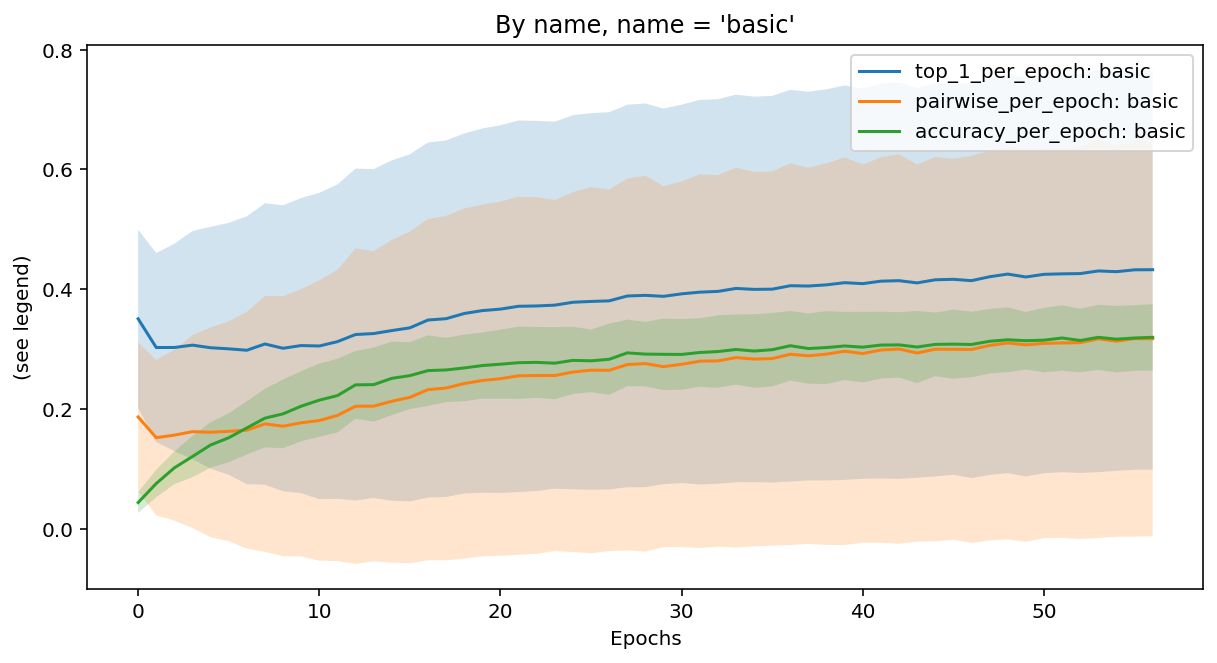

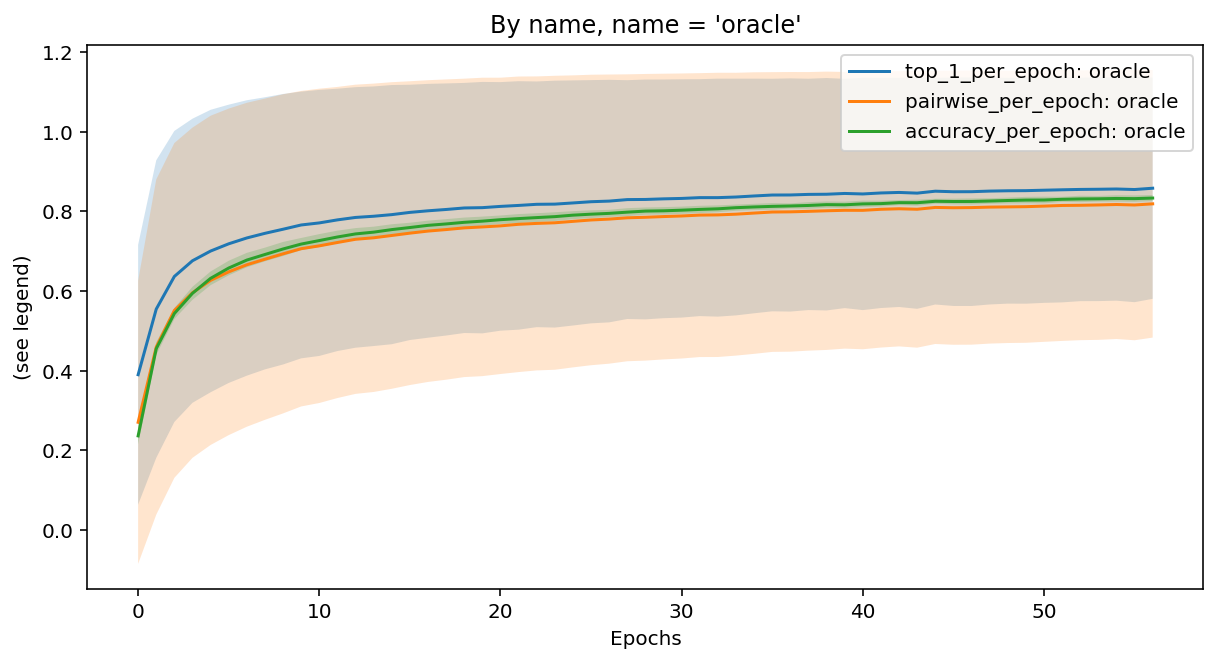

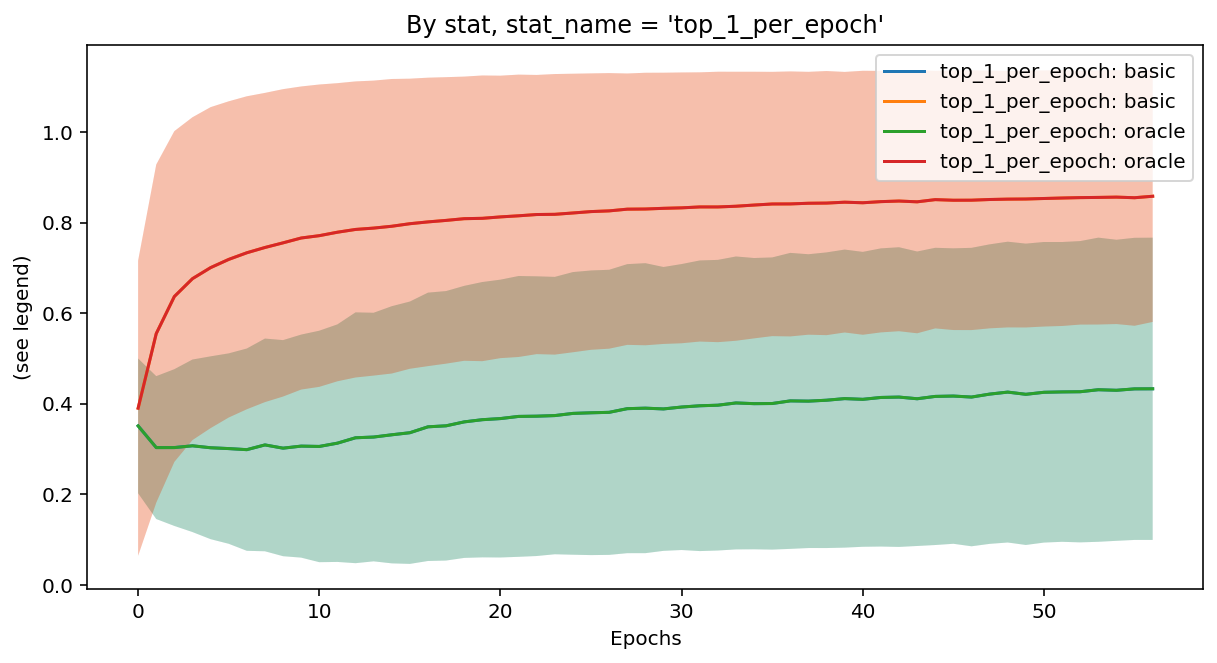

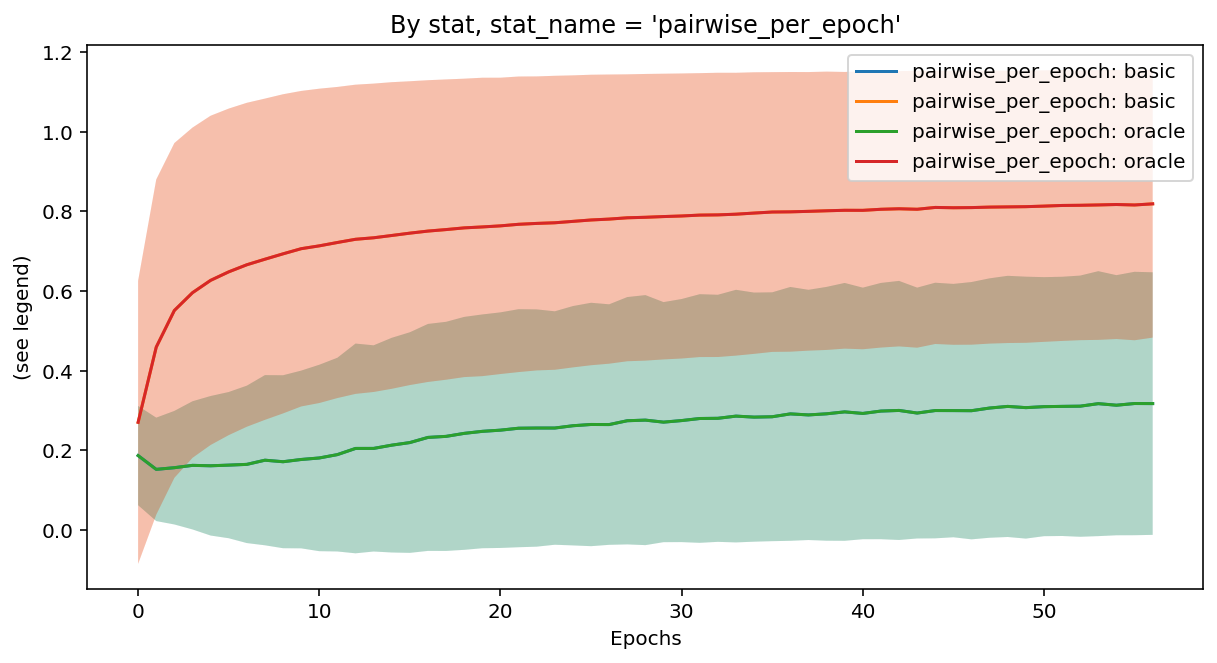

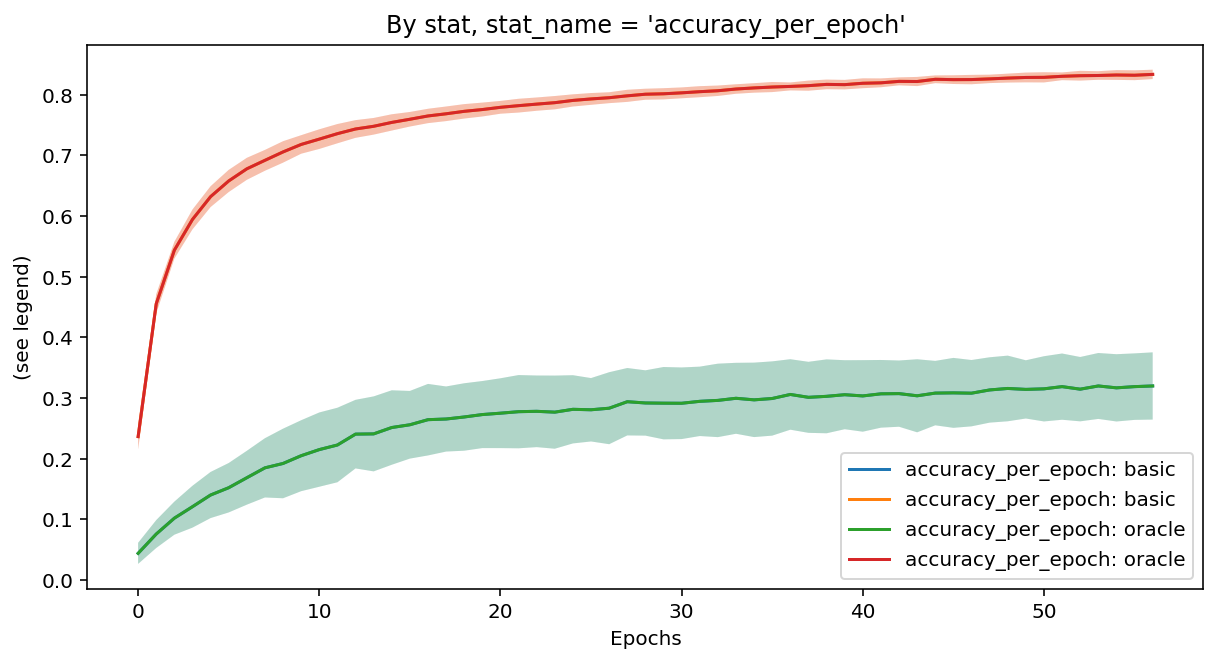

In [5]:
things_to_plot = dict(
    top_1_per_epoch=(top_1_per_epoch, top_1_per_epoch_std),
    pairwise_per_epoch=(pairwise_per_epoch, pairwise_per_epoch_std), 
    accuracy_per_epoch=(accuracy_per_epoch, accuracy_per_epoch_std),
)

for name in AGREEMENT_STATS_PATHS:
    plt.figure(figsize=(10, 5))
    for stat_name, stat_data in things_to_plot.items():
        for (name_mean, mean), (name_std, std) in zip(*[x.items() for x in stat_data]):
            assert name_mean == name_std
            if name_mean == name:
                plt.plot(mean, label=f"{stat_name}: {name}")
                plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2)
        # add the axis labels
        plt.xlabel("Epochs")
        plt.ylabel("(see legend)")
        plt.legend()
    plt.title(f"By name, {name = }")
    plt.show()

for stat_name, stat_data in things_to_plot.items():
    plt.figure(figsize=(10, 5))
    for name in AGREEMENT_STATS_PATHS:
        for (name_mean, mean), (name_std, std) in zip(*[x.items() for x in stat_data]):
            assert name_mean == name_std
            plt.plot(mean, label=f"{stat_name}: {name}")
            plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.2)
        # add the axis labels
        plt.xlabel("Epochs")
        plt.ylabel("(see legend)")
        plt.legend()
    plt.title(f"By stat, {stat_name = }")
    plt.show()

In [6]:
# For each possible accuracy value, find the epochs where it is reached:
ranges = np.linspace(0, 1, 100)
# epoch_basic = np.array([np.argmin(np.abs(x - v)) for x in ranges], dtype=np.int64)

associated_epochs = {
    k: np.array([np.argmin(np.abs(x - v)) for x in ranges], dtype=np.int64) 
    for k, v in accuracy_per_epoch.items()
}

pairwise_agreement = {k: pairwise_per_epoch[k][v] for k, v in associated_epochs.items()}

NameError: name 'v' is not defined

In [ ]:
for k, v in pairwise_agreement.items():
    plt.plot(v, ranges, label=k)
    for x, y in zip(v, ranges):
        plt.text(x, y, f"{x:.2f}")
    # plt.scatter(v, ranges, label=k)
    plt.ylabel("Pairwise agreement")
    plt.xlabel("accuracy")
plt.legend()

NameError: name 'pairwise_agreement' is not defined